In [1]:
#pip install transformers

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import json

In [4]:
# Step1: Creating a Function that extracts texts from JSON data and their corresponding Labels
# Step2: Load data from JSON files
# Step3: The Extracted data is then feeded into a dataframe with their respective labels

import pandas as pd

def extract_data_to_dataframe(data, label):
    dataframes = []
    for item in data:
        extracted_text = ''
        if 'data' in item:
            for data_item in item['data']:
                if 'text' in data_item:
                    extracted_text += data_item['text']
        if extracted_text:
            dataframes.append({'Text': extracted_text, 'Label': label})
    df = pd.DataFrame(dataframes)
    return df

# Load data from JSON files
with open('train_PlayMusic_full.json', encoding='latin-1') as f:
    data_1 = json.load(f)

with open('train_AddToPlaylist_full.json', encoding='latin-1') as f:
    data_2 = json.load(f)

with open('train_BookRestaurant_full.json', encoding='latin-1') as f:
    data_3 = json.load(f)

# Extract data and create DataFrames
df_1 = extract_data_to_dataframe(data_1['PlayMusic'], 'PlayingMusic')
df_2 = extract_data_to_dataframe(data_2['AddToPlaylist'], 'AddingToPlaylist')
df_3 = extract_data_to_dataframe(data_3['BookRestaurant'], 'BookingRestaurant')

# Concatenate DataFrames
df_combined = pd.concat([df_1, df_2, df_3], ignore_index=True)

# Assign integer values to labels
label_mapping = {'PlayingMusic': 0, 'AddingToPlaylist': 1, "BookingRestaurant": 2}
df_combined['Label_id'] = df_combined['Label'].map(label_mapping)

# Shuffle the DataFrame
df_combined = df_combined.sample(frac=1).reset_index(drop=True)


In [5]:
df_combined

,Text,Label,Label_id
0,book a spot for six friends,BookingRestaurant,2
1,Play some fun-punk,PlayingMusic,0
2,Book a table for 1 somewhere in Andorra,BookingRestaurant,2
3,Use Last Fm to play artist Kawabata Makoto fro...,PlayingMusic,0
4,Add the name as with gladness men of old to my...,AddingToPlaylist,1
...,...,...,...
5910,I want this artist on the Cena Elegante playlist,AddingToPlaylist,1
5911,Book a spot for nine at The Cubby Bear in Luxor,BookingRestaurant,2
5912,add artist to lo mejor de los 00's,AddingToPlaylist,1
5913,add share the well to my epic wall of sound,AddingToPlaylist,1


In [6]:
df_combined['Label'].head(100)

0     BookingRestaurant
1          PlayingMusic
2     BookingRestaurant
3          PlayingMusic
4      AddingToPlaylist
            ...        
95     AddingToPlaylist
96     AddingToPlaylist
97         PlayingMusic
98     AddingToPlaylist
99         PlayingMusic
Name: Label, Length: 100, dtype: object

## EXPERIMENTATION:

In [7]:
df_1 = df_combined

In [8]:
df_1['Label'].value_counts()

PlayingMusic         2000
BookingRestaurant    1973
AddingToPlaylist     1942
Name: Label, dtype: int64

In [9]:
seqlen = df_1['Text'].apply(lambda x: len(x.split()))

In [10]:
seqlen

0        6
1        3
2        8
3       11
4       14
        ..
5910     9
5911    11
5912     8
5913    10
5914    11
Name: Text, Length: 5915, dtype: int64

C:\Users\ankshith\AppData\Local\Temp\ipykernel_3372\207085835.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(seqlen)


<Axes: xlabel='Text', ylabel='Density'>

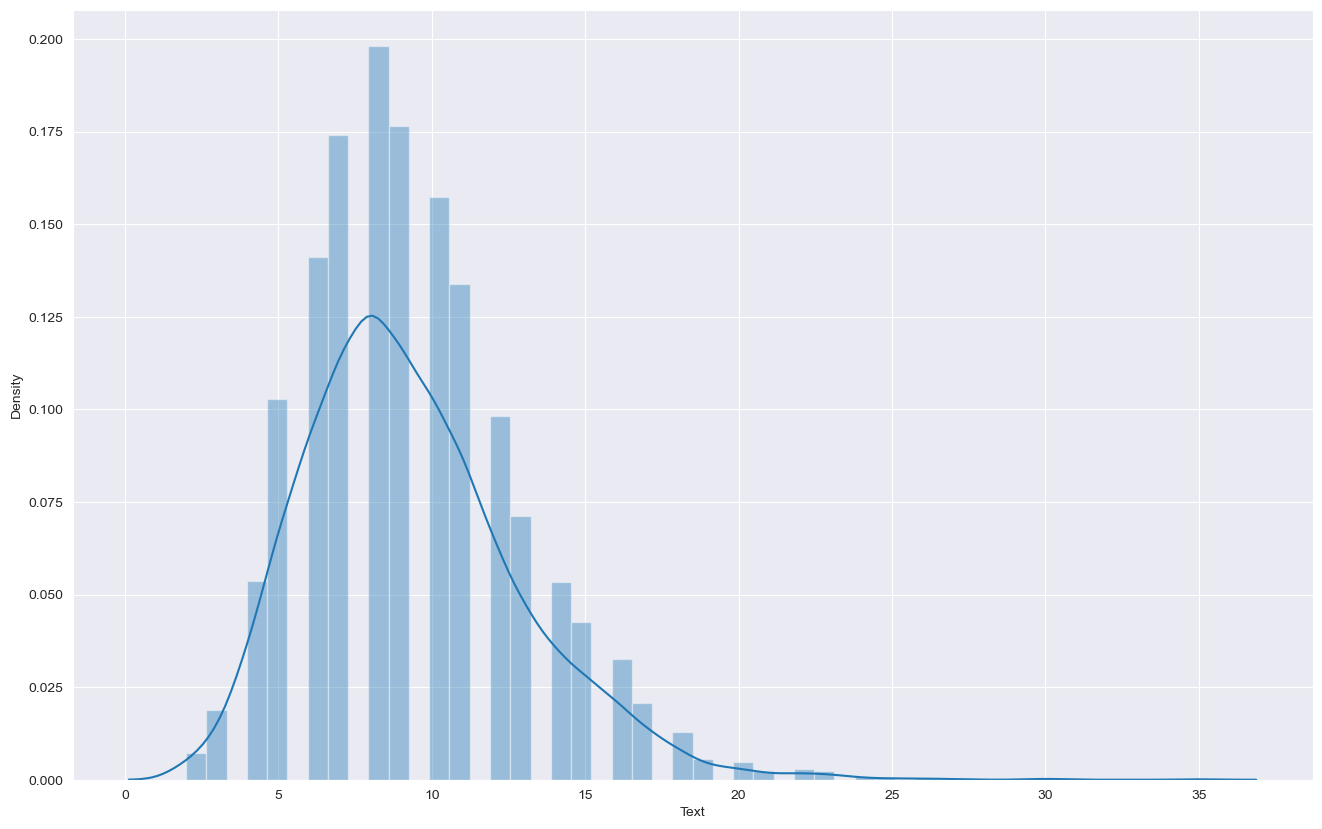

In [11]:
# Distribution of each length in the dataset

sns.set_style('darkgrid')
plt.figure(figsize=(16,10))
sns.distplot(seqlen)

In [12]:
SEQ_LEN = 35

In [13]:
from transformers import AutoTokenizer

In [14]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

In [15]:
#pip install tensorflow

In [16]:
import tensorflow as tf

In [17]:
tokens = tokenizer.encode_plus("hello_world", max_length=SEQ_LEN,
                               truncation=True, padding="max_length",
                               add_special_tokens=True,
                               return_attention_mask=True,return_tensors='tf')

In [18]:
tokens

{'input_ids': <tf.Tensor: shape=(1, 35), dtype=int32, numpy=
array([[ 101, 7592, 1035, 2088,  102,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0]])>, 'token_type_ids': <tf.Tensor: shape=(1, 35), dtype=int32, numpy=
array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])>, 'attention_mask': <tf.Tensor: shape=(1, 35), dtype=int32, numpy=
array([[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])>}

In [19]:
Xids = np.zeros((len(df_1), SEQ_LEN))
Xmask = np.zeros((len(df_1), SEQ_LEN))

In [20]:
Xids.shape

(5915, 35)

In [21]:
for i, sequence in enumerate(df_1['Text']):
  tokens = tokenizer.encode_plus(sequence, max_length=SEQ_LEN,
                               truncation=True, padding="max_length",
                               add_special_tokens=True,
                               return_attention_mask=True,return_tensors='tf')
  Xids[i, :], Xmask[i, :]  = tokens['input_ids'], tokens['attention_mask']

In [22]:
Xids

array([[ 101., 2338., 1037., ...,    0.,    0.,    0.],
       [ 101., 2377., 2070., ...,    0.,    0.,    0.],
       [ 101., 2338., 1037., ...,    0.,    0.,    0.],
       ...,
       [ 101., 5587., 3063., ...,    0.,    0.,    0.],
       [ 101., 5587., 3745., ...,    0.,    0.,    0.],
       [ 101., 5587., 7592., ...,    0.,    0.,    0.]])

In [23]:
Xmask

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.]])

In [24]:
df_1['Label_id'].unique

<bound method Series.unique of 0       2
1       0
2       2
3       0
4       1
       ..
5910    1
5911    2
5912    1
5913    1
5914    1
Name: Label_id, Length: 5915, dtype: int64>

In [25]:
arr = df_1['Label_id'].values
arr.size

5915

In [26]:
labels = np.zeros((arr.size, arr.max()+1))
labels.shape

(5915, 3)

In [27]:
labels[np.arange(arr.size), arr] = 1
labels

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [28]:
with open('xids.npy', 'wb') as f:
  np.save(f, Xids)
with open('xmask.npy', 'wb') as f:
  np.save(f, Xmask)
with open('labels.npy', 'wb') as f:
  np.save(f, labels)


del df_1, Xids, Xmask, labels

In [29]:
with open('xids.npy', 'rb') as fp:
  Xids = np.load(fp)
with open('xmask.npy', 'rb') as fp:
  Xmask = np.load(fp)
with open('labels.npy', 'rb') as fp:
  labels = np.load(fp)

In [30]:
Xids

array([[ 101., 2338., 1037., ...,    0.,    0.,    0.],
       [ 101., 2377., 2070., ...,    0.,    0.,    0.],
       [ 101., 2338., 1037., ...,    0.,    0.,    0.],
       ...,
       [ 101., 5587., 3063., ...,    0.,    0.,    0.],
       [ 101., 5587., 3745., ...,    0.,    0.,    0.],
       [ 101., 5587., 7592., ...,    0.,    0.,    0.]])

In [31]:
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU')

[]

In [32]:
dataset = tf.data.Dataset.from_tensor_slices((Xids, Xmask,labels))

In [33]:
dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(35,), dtype=tf.float64, name=None), TensorSpec(shape=(35,), dtype=tf.float64, name=None), TensorSpec(shape=(3,), dtype=tf.float64, name=None))>

In [34]:
for i in dataset.take(1):
  print(i)

(<tf.Tensor: shape=(35,), dtype=float64, numpy=
array([ 101., 2338., 1037., 3962., 2005., 2416., 2814.,  102.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.])>, <tf.Tensor: shape=(35,), dtype=float64, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])>, <tf.Tensor: shape=(3,), dtype=float64, numpy=array([0., 0., 1.])>)


In [35]:
def map_func(input_ids, masks, labels):
  return {"input_ids": input_ids, "attention_mask":masks}, labels


In [36]:
dataset = dataset.map(map_func)

In [37]:
for i in dataset.take(1):
  print(i)

({'input_ids': <tf.Tensor: shape=(35,), dtype=float64, numpy=
array([ 101., 2338., 1037., 3962., 2005., 2416., 2814.,  102.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.])>, 'attention_mask': <tf.Tensor: shape=(35,), dtype=float64, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])>}, <tf.Tensor: shape=(3,), dtype=float64, numpy=array([0., 0., 1.])>)


In [38]:
dataset = dataset.shuffle(10000).batch(32)

In [39]:
DS_LEN = len(list(dataset))

In [40]:
DS_LEN

185

In [2]:
SPLIT = .8

train = dataset.take(round(DS_LEN*SPLIT))
val = dataset.skip(round(DS_LEN*SPLIT))


del dataset

NameError: name 'dataset' is not defined

In [42]:
from transformers import TFAutoModel

In [43]:
bert = TFAutoModel.from_pretrained('bert-base-uncased')

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [44]:
input_ids = tf.keras.layers.Input(shape=(SEQ_LEN), name='input_ids', dtype='int32')
mask = tf.keras.layers.Input(shape=(SEQ_LEN), name='attention_mask',dtype='int32')

embeddings = bert(input_ids, attention_mask=mask)[0]

X = tf.keras.layers.GlobalMaxPool1D()(embeddings)
X = tf.keras.layers.BatchNormalization()(X)
X = tf.keras.layers.Dense(128, activation='relu')(X)
X = tf.keras.layers.Dropout(0.1)(X)
X = tf.keras.layers.Dense(32, activation='relu')(X)
y = tf.keras.layers.Dense(3, activation="softmax", name="outputs")(X)

model = tf.keras.Model(inputs=[input_ids, mask], outputs=y)


model.layers[2].trainable = False

In [45]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 35)]         0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 35)]         0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  109482240   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 35,                                            

In [46]:
optimizer = tf.keras.optimizers.Adam(0.01)
loss = tf.keras.losses.CategoricalCrossentropy()
acc = tf.keras.metrics.CategoricalAccuracy('accuracy')

model.compile(optimizer=optimizer, loss=loss, metrics=[acc])

In [47]:
history = model.fit(
    train,
    validation_data=val,
    epochs=5
)

Epoch 1/5
148/148 [==============================] - 415s 3s/step - loss: 0.1884 - accuracy: 0.9436 - val_loss: 0.0786 - val_accuracy: 0.9813
Epoch 2/5
148/148 [==============================] - 384s 3s/step - loss: 0.0817 - accuracy: 0.9730 - val_loss: 0.0185 - val_accuracy: 0.9949
Epoch 3/5
148/148 [==============================] - 347s 2s/step - loss: 0.0674 - accuracy: 0.9780 - val_loss: 0.0096 - val_accuracy: 0.9958
Epoch 4/5
148/148 [==============================] - 345s 2s/step - loss: 0.0570 - accuracy: 0.9833 - val_loss: 0.0244 - val_accuracy: 0.9915
Epoch 5/5
148/148 [==============================] - 353s 2s/step - loss: 0.0628 - accuracy: 0.9785 - val_loss: 0.0206 - val_accuracy: 0.9949


In [48]:
model.evaluate(val)

37/37 [==============================] - 73s 2s/step - loss: 0.0346 - accuracy: 0.9958


[0.03459068387746811, 0.995759129524231]

In [49]:
y_predicted = model.predict(val)

37/37 [==============================] - 69s 2s/step


In [50]:
y_predicted

array([[1.2639136e-26, 7.9417823e-19, 1.0000000e+00],
       [5.1310077e-02, 9.4556147e-01, 3.1284515e-03],
       [1.1032375e-27, 5.5515135e-20, 1.0000000e+00],
       ...,
       [1.2099008e-01, 8.4640974e-01, 3.2600157e-02],
       [4.8127179e-03, 9.9517196e-01, 1.5354157e-05],
       [1.6936480e-25, 3.2320128e-19, 1.0000000e+00]], dtype=float32)

In [51]:
y_predicted = y_predicted.flatten()
y_predicted

array([1.2639136e-26, 7.9417823e-19, 1.0000000e+00, ..., 1.6936480e-25,
       3.2320128e-19, 1.0000000e+00], dtype=float32)

In [52]:
import numpy as np

y_predicted_labels = np.argmax(y_predicted, axis=0)

In [1]:
len(train)

NameError: name 'train' is not defined

In [61]:
sample_dataset = [
 'Book a table for Tommorow at 12am',
 'Can you add a song to my playlist',
 'Add songs of Bruno Mars to my playlist.',
 'Can you play Mirako Songs',
 "Can you play Jacob Songs."
]


In [62]:
import tensorflow as tf
from transformers import BertTokenizer
import numpy as np

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
SEQ_LEN = 35

Xids = np.zeros((len(sample_dataset), SEQ_LEN), dtype='int32')
Xmask = np.zeros((len(sample_dataset), SEQ_LEN), dtype='int32')

for i, sequence in enumerate(sample_dataset):
    tokens = tokenizer.encode_plus(sequence, max_length=SEQ_LEN,
                                   truncation=True, padding="max_length",
                                   add_special_tokens=True,
                                   return_attention_mask=True, return_tensors='tf')
    input_ids = tokens['input_ids'][:, :SEQ_LEN]
    attention_mask = tokens['attention_mask'][:, :SEQ_LEN]
    Xids[i, :input_ids.shape[1]] = input_ids
    Xmask[i, :attention_mask.shape[1]] = attention_mask


In [63]:
predictions = model.predict([Xids, Xmask])

1/1 [==============================] - 0s 452ms/step


In [64]:
predicted_labels = np.argmax(predictions, axis=1)

In [65]:
class_names = ["PlayingMusic", "AddingToPlaylist", "BookingRestaurant"]

In [66]:
predicted_class_names = [class_names[label] for label in predicted_labels]

In [67]:
predicted_class_names

['BookingRestaurant',
 'AddingToPlaylist',
 'AddingToPlaylist',
 'PlayingMusic',
 'PlayingMusic']

In [60]:
# Saving the model in h5 format

#model.save("bert_model.h5")